In [5]:
#Change path for data 
#Just run once 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import os
from keras import backend as K
import math

In [6]:
#data = np.load("C:/Users/19133/Documents/Research/Feldman/ML/ML100ours.npy")

rs = [3400,30] #redshift, distance cutoff 

data = np.load("C:/Users/19133/Documents/Research/Feldman/ML/ML Boxes/ML100-error4.npy")

redshift0 = data[:,0] 
distance0 = data[:,2]
distance_mod0 = data[:,1]
velocity0 = data[:,3]

inds = np.where(redshift0 <= rs[0])
redshift = redshift0[inds]
distance = distance0[inds]
distance_mod = distance_mod0[inds]
velocity = velocity0[inds]

In [7]:
X = np.stack([redshift/np.max(np.abs(redshift)), distance_mod/np.max(np.abs(distance_mod))],axis=-1)
y = np.stack([velocity/np.max(np.abs(velocity)), distance/np.max(np.abs(distance))],axis=-1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Epoch 1/5
5278/5278 [==============================] - 4s 599us/step - loss: 0.0140
Epoch 2/5
5278/5278 [==============================] - 3s 596us/step - loss: 0.0105
Epoch 3/5
5278/5278 [==============================] - 3s 599us/step - loss: 0.0102
Epoch 4/5
5278/5278 [==============================] - 3s 600us/step - loss: 0.0102
Epoch 5/5
5278/5278 [==============================] - 3s 596us/step - loss: 0.0101
Epoch 6/10
5278/5278 [==============================] - 3s 604us/step - loss: 0.0095
Epoch 7/10
5278/5278 [==============================] - 3s 601us/step - loss: 0.0095
Epoch 8/10
5278/5278 [==============================] - 3s 613us/step - loss: 0.0095
Epoch 9/10
5278/5278 [==============================] - 3s 599us/step - loss: 0.0095
Epoch 10/10
5278/5278 [==============================] - 3s 601us/step - loss: 0.0095
Epoch 11/15
5278/5278 [==============================] - 3s 598us/step - loss: 0.0094
Epoch 12/15
5278/5278 [==============================] - 3s 599us/st

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


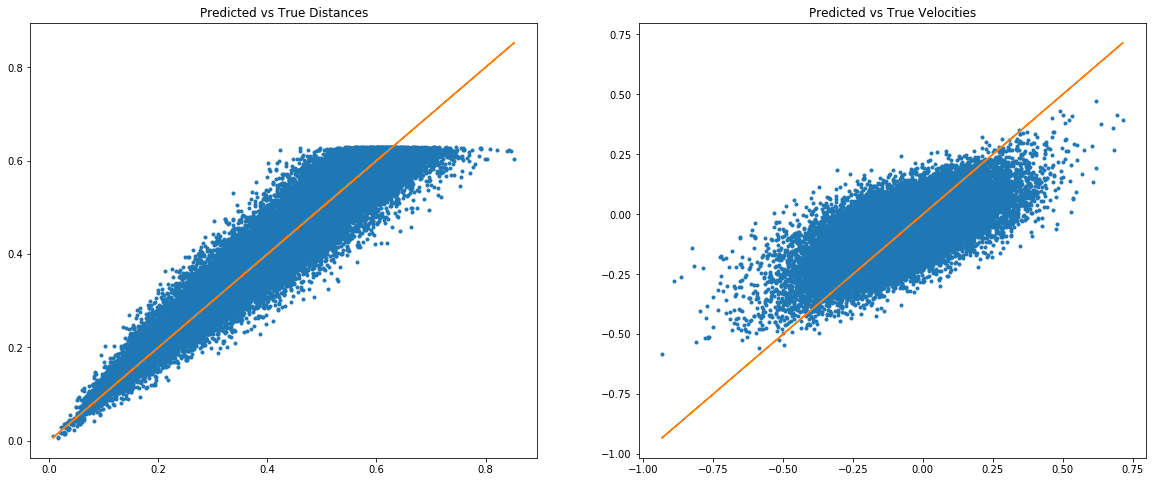

In [9]:
import time
start = time.time()
model1 = keras.models.Sequential()
model1.add(keras.layers.InputLayer(input_shape=[2]))
model1.add(keras.layers.Dense(25,activation='tanh'))
model1.add(keras.layers.Dense(50,activation='tanh'))
model1.add(keras.layers.Dense(100,activation='tanh'))
model1.add(keras.layers.Dense(50,activation='tanh'))
model1.add(keras.layers.Dense(25,activation='tanh'))
model1.add(keras.layers.Dense(2,activation='tanh'))
optimizer = keras.optimizers.Adam(lr=.001)
model1.compile(loss='mean_squared_error', optimizer=optimizer)
model1.fit(X_train,y_train,epochs=5)
K.set_value(model1.optimizer.learning_rate, 0.0001)
model1.fit(X_train,y_train,initial_epoch=5,epochs=10)
K.set_value(model1.optimizer.learning_rate, 0.00001)
model1.fit(X_train,y_train,initial_epoch=10,epochs=15)
K.set_value(model1.optimizer.learning_rate, 0.000001)
model1.fit(X_train,y_train,initial_epoch=15,epochs=20)
K.set_value(model1.optimizer.learning_rate, 0.0000001)
model1.fit(X_train,y_train,initial_epoch=20,epochs=25)
K.set_value(model1.optimizer.learning_rate, 0.00000001)
model1.fit(X_train,y_train,initial_epoch=25,epochs=30)
end = time.time()
print(end-start)
y_pred = model1.predict(X_test)

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


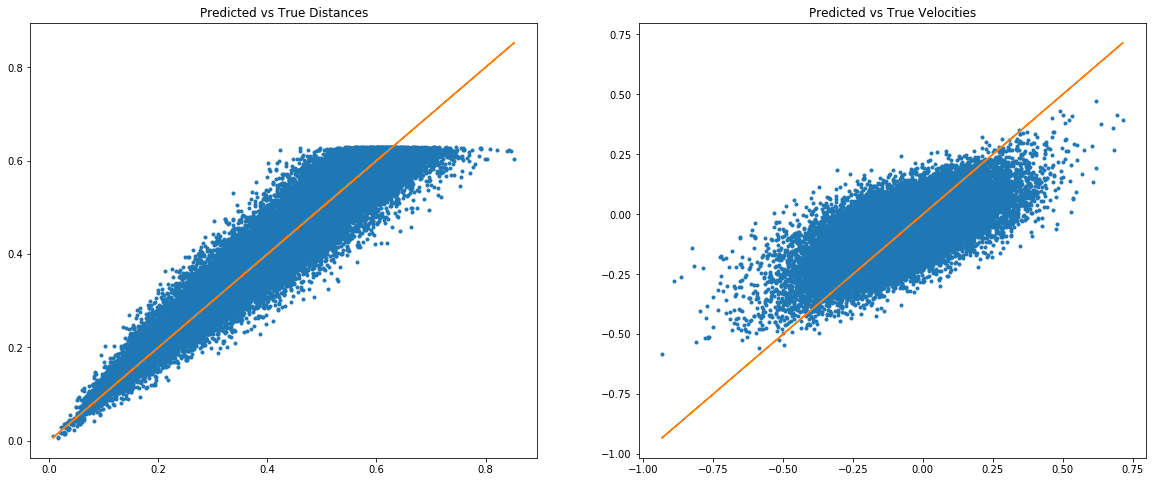

In [11]:
fig = plt.figure()
fig.set_figheight(8) 
fig.set_figwidth(20) 

m = np.where(y_pred[:,1]*np.max(np.abs(distance)) <= rs[1])

predvel = y_pred[:,0][m]#*1.2
preddist = y_pred[:,1][m]

a = fig.add_subplot(1,2,1)
plt.plot(y_test[:,1][m],preddist,'.')
plt.plot(y_test[:,1][m],y_test[:,1][m])
plt.title('Predicted vs True Distances')

a = fig.add_subplot(1,2,2)
plt.subplot(1, 2, 2)
plt.plot(y_test[:,0][m],predvel,'.')
plt.plot(y_test[:,0][m],y_test[:,0][m])
plt.title('Predicted vs True Velocities')
plt.savefig('NN Predicted vs True.png',transparent=True)




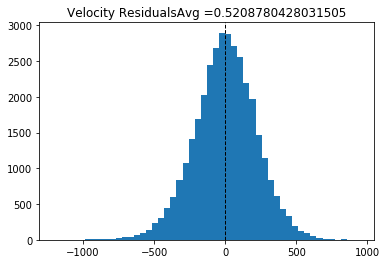

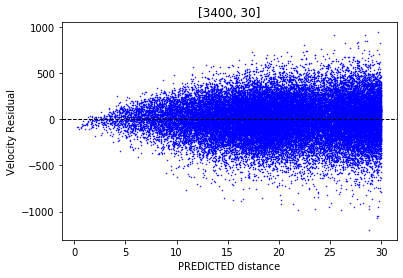

In [13]:
vel_resids = (y_test[:,0][m] - predvel)*np.max(np.abs(velocity))
avg = np.mean(vel_resids)
plt.hist(vel_resids,bins=50)
plt.axvline(vel_resids.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Velocity Residuals' + 'Avg =' + str(avg))
plt.savefig('NN Velocity Residuals',transparent=True)
plt.show()

plt.plot(y_pred[:,1][m]*np.max(np.abs(distance)),vel_resids,'bo',markersize='.5')
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
plt.title(str(rs))
plt.xlabel('PREDICTED distance')
plt.ylabel('Velocity Residual')
#plt.ylim(-800,800)
plt.savefig('RF Residual Dist ' + str(rs),transparent=True)
plt.show()